# Python Assignment
This jupyter notebook documents the complete workflow for data analysis using Dr. X's python scripts

Assignment submitted by David D. Ray

### Python Environment: Required Files
Three files are required for workflow analysis
    * sequence_translate.py
    * penguins_mass.csv
    * penguins_cytb.fasta

These files can be found in the repository associated with this jupyter notebook:
https://github.com/rayx0106/Python_Assignment

In [150]:
ls

BCB546X_Fall_2019_Python_Assignment.ipynb
README.md
penguins_cytb.fasta
penguins_mass.csv
penguins_mass_cytb.csv
sequence_translate.py


### Python Environment: Required Modules
```
$ pip install biopython # using a terminal

or 

$ conda install biopythong # using anacanda through a terminal
```


#### Once biopython is installed  we need to install the following modules
```
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
```

    * The SeqIO module enables reading in sequences from FASTA files
    * The CodonTabe module enables translation of nucleotides to amino acids
    * The pd module reads in our data directly into our DataFrame (remember a DataFrame is 0-based index)

In [151]:
from Bio import SeqIO # from the Bio package we import SeqIO module
from Bio.Data import CodonTable # from the Bio.Data package we import the CondonTable module
import pandas as pd # we import Pandas library and assign the nickname pd

## Functions

### Part 1: Import Fasta Sequences

#### Dr. X's code
```
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
```
Syntax Explained:
* This code defines a function called ```get_sequences_from_file``` that reads a fasta file using the ```fasta_fn``` argument
* ```sequence_data_dict``` creates a empty dictionary for storing keys and values 
* Explanation of the for loop
    1. The ```for``` loop interates through each record in the input fasta file
    2. The ```SeqIO.parse()``` function access the file content
    3. The ```record``` variable initated is used to store the parsed record
* Loop body
    1. An object called ```description``` is initiated stores the meta data (i.e. fasta header) of the ```record``` and the ```split()``` function seperates the header data stored as a string into a ```list``` of elements
    2. We initiate an object called ```species_name``` and we call the second and third elemet of the ```description``` list. Remember python is 0-indexed so ```description[1]``` indexes the 2nd element and ```description[2]``` indexes the 3rd element of the list. There is a deliberate blane between the two elements.
   (Remember in standard fasta output we will see the these indexes to be *genus* then *species*) 
    3. The DNA sequence of ```record``` is added to the ```sequence_data_dict``` dictionary using ```species_name``` as the index
* Return
    1. After interating through every ```record``` element of the fasta file, a ```return``` function returns a initiated dictionary



In [152]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)


Now use the ```get_sequences_from_file``` function to read in ```penguins_cytb.fasta``` file

In [153]:
penguins_cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [154]:
penguins_cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

### Part 2: String-Translate Function
    * Write a function that translates sequences
    * All sequences start at codon position 1
    * Complete a function that translates using a lopp over the string of nucleotides
    
Pseudo-code example:
```
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
         add the aa to aa_seq_string
     return(aa_seq_string)
```


In [155]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

In [156]:
mito_table # check to see if object was imported successfully

NCBICodonTableDNA(id=2, names=['Vertebrate Mitochondrial', 'SGC1'], ...)

In [157]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    i = 0
    while i < len(string_nucleotides):
        codon = string_nucleotides[i:i+3]
        if (codon == 'TAG' or codon == 'TAA' or codon == 'AGA' or codon == 'AGG'):
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
        i += 3
    return(aa_seq_string)


Syntax Explained:

Defining the Function 
1. Create a function called ```translate_function``` with a input argument called ```string_nucleotides```
2. The ```string_nucleotides``` argument must be a DNA sequence string variable
3. An object called ```mito_table``` is created, this module uses a class called CodonTable which supplies a condon-table and input argument ```unambiguous_dna_by_name``` which allows for a assigned value "Vertebrate Mitochondrial" to be referenced from NCBI source: https://biopython.org/DIST/docs/api/Bio.Data.CodonTable-module.html
4. a string object called ```aa_seq_string``` is created. This is a object that will be referenced by a variable and will have data passed into during each iteration of the while:if loop and then return at the end of the function
5. The iteration object ```i = 0``` is created 
DNA to Amino Acid Translation ```while``` Loop
1. ```while``` our numeric object of ```i``` is less then the length of the sequences defined by the ```string_nucleotides``` argument the loop proceeds
2. ```codon``` object created that uses the ```string_nucleotides[i:i+3]``` argument with the condition of 3 nucleotides long. This object will be passed into our ```if``` loop 
DNA to Amino Acid Translation ```if``` Loop
1. If the ```codon``` object is determined to be identical to one of the four "stop" codons then the loop ends
2. If the ```codon``` object is determined **NOT** to be one of the "stop" codons the other option in this if loop is performed
    
    2.1. Object ```aa``` is created and the one letter amino acid identifier that is translated from the 3 nucleotide codon sequence is given
    
    2.2. This translated codon amino acid ID in the ```aa``` object is added to the newly created ```aa_seq_string``` object which will be returned at the end of function with the amino acid profile for each sequence.
    
    2.3 We have ```i``` increase by a value of 3. This is key because this compiles the next 3 nucleotides for the next iteration of the loop. This is how we iterated through an entire DNA nucleotide sequence or until a "stop" codon is found
    
    2.4 As previously stated, once the loop is terminated the function returns the ```aa_seq_string``` object containing the amino acid profiles of each unique DNA sequence.

### Part 3: Alternative String-Translation Function
The provided function utilizes addtional BioPython utilities

Source:http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25 see section 3.4 and 3.9

In [158]:
from Bio.Seq import Seq # Seq type object
from Bio.Alphabet import IUPAC
def alt_translate_function(string_nucleotides):
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna) # coercion rules
    aa_seq_string = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(aa_seq_string)

Syntax Explained:

Prepare Python Enviroment
1. Import required packages (Take note the we import ```Seq``` type object instead of a ```string```)
    1.1 A ```Bio.Alphabet``` is defined as well

Define Function
1. A function a called ```alt_translate_function``` is created again requiring a ```string_nucleotides``` input argument (previously discussed)
2. A ```Seq``` object called ```coding_dna``` is created containing the DNA sequences of ```string_nucleotides``` and and we coerce the ```String``` type of data that the DNA sequence will be in to a ```Seq``` type

3. An object called ```aa_seq_string``` is created and contains the one letter amino acid identifier obtained by ```coding_dna.translate```. Translation will continue until a "stop" codon is reached
4. ```return``` of the ```aa_seq_string``` object containg the amino acid profile of each DNA sequence


Coercion Rules for Reference:

If input is ```Seq```-type object and needs to be coerced into a ```string```-type object:
        ```object_name``` = ```seq(string_argument)```

If input is ```string```-type object and needs to be coerced into a ```Seq```-type object:
        ```object_name``` = ```str(seq_argument)```  

### Part 4: Molecular Weight Analysis
This function calculates the molecular weight of each amino acid sequence using the ProtParam module

Import ProtPara prior to running function
```
from Bio.SeqUtils.ProtParam import ProteinAnalysis
```
The constructor takes two arguments. The first is the protein sequence as a string, which is then converted to a sequence object using the Bio.Seq module. This is done just to make sure the sequence is a protein sequence and not anything else.

The second argument is optional. If set to True, the weight of the amino acids will be calculated using their monoisotopic mass (the weight of the most abundant isotopes for each element), instead of the average molecular mass (the averaged weight of all stable isotopes for each element). If set to false (the default value) or left out, the IUPAC average molecular mass will be used for the calculation.

source: https://biopython.org/DIST/docs/api/Bio.SeqUtils.ProtParam.ProteinAnalysis-class.html

Pseudo-code example:
```
def compute_molecular_weight(aa_seq):
# I think the ProtParam functions may require aa_seq to be a string.
# It may not work if the amino acid sequence has stop codons.
    run the ProteinAnalysis() function on aa_seq
	  return the molecular weight
```

In [159]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def calculate_mw(aa_seq):
    computed_seq = ProteinAnalysis(aa_seq)
    aa_seq_mw = computed_seq.molecular_weight()
    return(aa_seq_mw)

Syntax Explained:

Define Function
1. Creates an object called ```calculate_mw``` that requires the ```aa_seq``` input arugument
2. The ```aa_seq``` input is the one letter amino acid identifier
3. ```computed_seq``` object uses ```ProteinAnalysis(aa_seq)``` to compute molecular weight of the sequence
4. ```aa_seq_mw``` contains the ```computed_seq``` object with the computed mw array
5. Return the computed mw by using the ```return``` function on the ```aa_seq_mw``` object

### Part 5: GC-Content Analysis
This function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value

In [160]:
def compute_GC_content(string_nucleotides):
    count = 0
    for base in string_nucleotides:
        if (base == 'G' or base == 'C'):
            count += 1
    return(count / len(string_nucleotides)*100)

Syntax Explained: 

Define Function
1. Define ```compute_GC_content``` function that requires a ```string_nucleotides``` input argument
        * Remember this input argument must be a string type 
        * In this case as previously explained is a DNA sequence string
        * Check to see if coercion rules apply
2. A numeric object ```count``` is created and set to 0. The ```count``` object will be used for enumerating the incidence of "G" and "C" for each sequence  
for loop
1. for each base in the sequence argument provided (```for base in string_nucleotides:```)
        1.1 if the ```base``` mathces a "G" or "C" increase ```count``` by a value of 1
        1.2. iterate through the entire sequence
2. The ```return``` function returns the ```count``` object divided by the length fo the DNA sequence multiplied by 100 to get a percetage.


Another Method using ```Bio.SeqUtils```

In [161]:
from Bio import SeqIO
from Bio.SeqUtils import GC

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("penguins_cytb.fasta", "fasta"))

In [162]:
gc_values

[47.15660542432196,
 47.76902887139108,
 48.20647419072616,
 48.29396325459317,
 48.38145231846019,
 49.08136482939633,
 49.25634295713036,
 49.25634295713036,
 49.69378827646544,
 50.83114610673666,
 50.91863517060367,
 51.181102362204726]

## DataFrame Initialization and Modifications

#### Read in ```penguins_cytb.fasta``` file

```
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
```


In [163]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # this previously defined function from part 1 will read in the file and initiate a variable 

### Initiate DataFrame
```
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)
```
The Pandas library allows us to read in a csv file into a DataFrame that will provide data structures and allow for data visualization along with intergration into other arrarys

Then we initiate a list data structure from ```penguins.df.species```

In [164]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [165]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [166]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

### Part 6: DataFrame Modification
Two new columsn will be added to the ```penguins_df``` from the data returned for (1) GC-content and (2) molecular weight iterations 

A value of 'NaN' will be returned to indicate empty cells

In [167]:
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'

In [168]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


### Part 7: for-loop function
This function is a  for-loop that translates each sequence and also gets molecular weight and computes the GC contentof each translated sequence and adds those data to DataFrame

Pseudo-code
for key, value in cytb_seqs.items():
```
aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above
```

In [169]:
for key, value in cytb_seqs.items():
    aa_seq = translate_function(str(value)) # coerced into a string-type
    mol_weight = calculate_mw(str(aa_seq))
    GC_content = compute_GC_content(value)
    penguins_df.loc[penguins_df['species'].str.contains(key), 'molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df['species'].str.contains(key), 'GC_content'] = GC_content

Syntax Explained:

for loop
1. a ```for``` loop is created that iterates through each item of the ```cytb_seqs``` dictionary created by the first function of this analysis
    
Loop Iteration (Invocation of Previously Defined Functions)
1. An object called ```aa_seq``` is created to store the result of the second function for DNA to Amino Acid Translation on the ```value``` variable 

Another way to think of it is to say that the function acts on the ```value``` variable and stores the results in the ```aa_seq``` object
  
2. An object called ```mol_weight``` is created to store the result of the forth function for the calculating the  molecular weight of a amino acid sequence on the ```aa_seq``` object
    
3. An object called ```GC_content``` is created to store the result of the fifth function for calculating the GC-content in terms of percentage on the ```value``` variable
    
4. ```loc``` reads the ```penguins.df``` DataFrame for the cell that has in the ```species``` column the species name defined by the ```key``` variable, this gives a row coordinate indicator, and the column ```Molecular_Weight``` as a column coordinate (this adds the column label). The value of the cell (which is empty at this point) is replaced with the value provided from ```mol_weight``` being guided by the ```key``` in the ```species``` column


5. ```loc``` reads the ```penguins.df``` DataFrame for the cell that has in the ```species``` column the species name defined by the ```key``` variable, this gives a row coordinate indicator, and the column ```GC_content``` as a column coordinate (this adds the column label). The value of the cell (which is empty at this point) is replaced with the value from ```GC_content``` being guided by the ```key``` in the ```species``` column

In [170]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


### Part 8:  Data Visualization
Bar-chart of the mass of each species names

Prepare python environment
```
import matplotlib.pyplot as plt
import seaborn as sns
```

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Also, remember that you need to include an inline command if you’re using a Jupyter notebook or IPython in spyder:
```
%matplotlib inline
```


In [172]:
matplotlib inline

Text(0.5, 1.0, 'Avg. Body Mass Per Species')

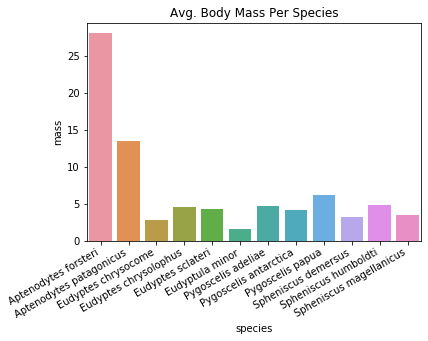

In [173]:
g = sns.barplot("species","mass", data=penguins_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_title('Avg. Body Mass Per Species')

#### Looking at the visual representation of the data we can answer two questions

  Question 1: What is the smallest penguin species? 
        
  Answer: *Eudyputla minor*
  
  Question 2: What else is interesting about this species?
        
  Answer: *Eudyputla minor* known as the **little penguin** is the smallest species of penguin and go by several other names including **little blue penguins** due to their slate-blue plumage 
  
source: https://en.wikipedia.org/wiki/Little_penguin

### Part 9: Data Visualization
molecular weight (y-axis) as a function of GC-content (x-axis)

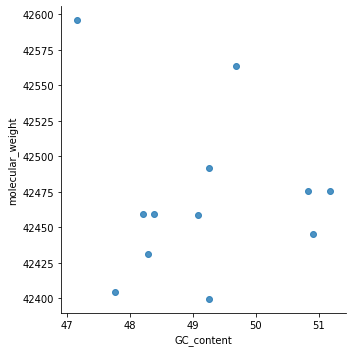

In [174]:
h = sns.lmplot("GC_content","molecular_weight", data=penguins_df, fit_reg=False)

### Part 10: Save New DataFrame
Write modified ```penguins_df``` to ```penguins_mass_cytb.csv```

In [175]:
penguins_df.to_csv("penguins_mass_cytb.csv", index = False)

In [176]:
pd.read_csv("penguins_mass_cytb.csv")

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


### Part 11: Additional DataFrame Analysis

In [177]:
type(penguins_df) # the data type of the data stored

pandas.core.frame.DataFrame

In [178]:
penguins_df.__class__ # differnt syntax same output, penguins_df is <class 'pandas.core.frame.DataFrame'>

pandas.core.frame.DataFrame

In [179]:
penguins_df.dtypes

species              object
mass                float64
molecular_weight     object
GC_content           object
dtype: object

In [180]:
penguins_df.shape

(12, 4)

In [181]:
pd.unique(penguins_df['species'])

array(['Aptenodytes forsteri', 'Aptenodytes patagonicus',
       'Eudyptes chrysocome', 'Eudyptes chrysolophus',
       'Eudyptes sclateri', 'Eudyptula minor', 'Pygoscelis adeliae',
       'Pygoscelis antarctica', 'Pygoscelis papua', 'Spheniscus demersus',
       'Spheniscus humboldti', 'Spheniscus magellanicus'], dtype=object)

In [182]:
import math
import numpy as np

In [183]:
penguins_df['log_value'] = np.log(penguins_df['mass']) # lets perform a log transformation on mass
print(penguins_df)

                    species   mass molecular_weight GC_content  log_value
0      Aptenodytes forsteri  28.00          42459.6    48.3815   3.332205
1   Aptenodytes patagonicus  13.40          42563.7    49.6938   2.595255
2       Eudyptes chrysocome   2.80          42475.6    51.1811   1.029619
3     Eudyptes chrysolophus   4.50          42445.5    50.9186   1.504077
4         Eudyptes sclateri   4.25          42475.6    50.8311   1.446919
5           Eudyptula minor   1.60          42491.6    49.2563   0.470004
6        Pygoscelis adeliae   4.60          42458.6    49.0814   1.526056
7     Pygoscelis antarctica   4.10          42404.5     47.769   1.410987
8          Pygoscelis papua   6.10          42595.9    47.1566   1.808289
9       Spheniscus demersus   3.20          42431.5     48.294   1.163151
10     Spheniscus humboldti   4.75          42399.6    49.2563   1.558145
11  Spheniscus magellanicus   3.40          42459.6    48.2065   1.223775
